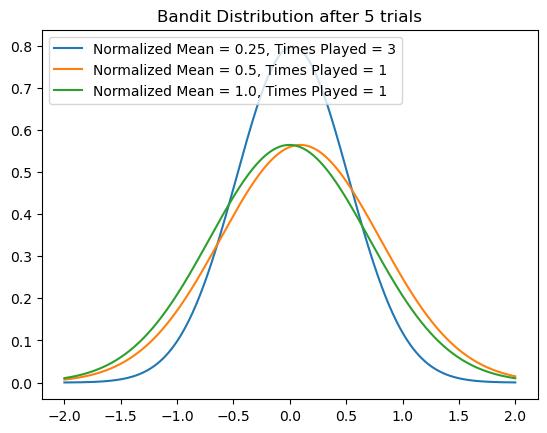

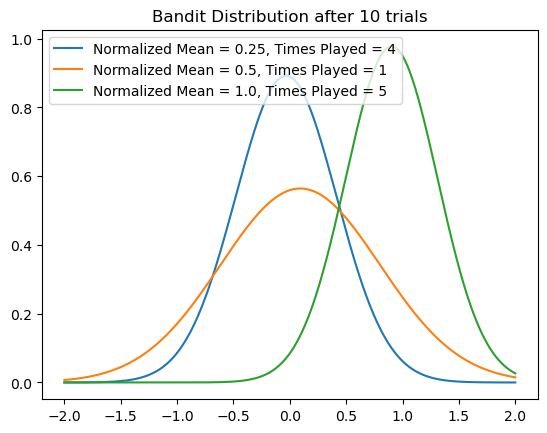

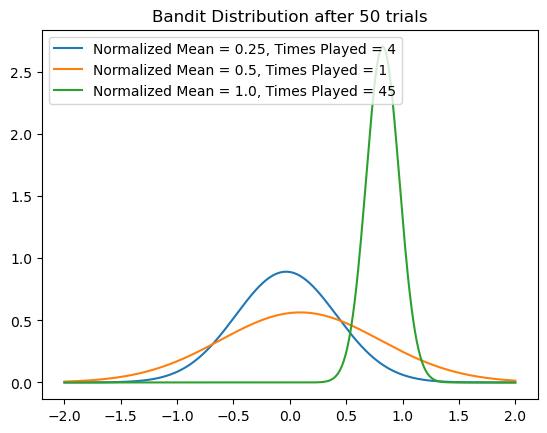

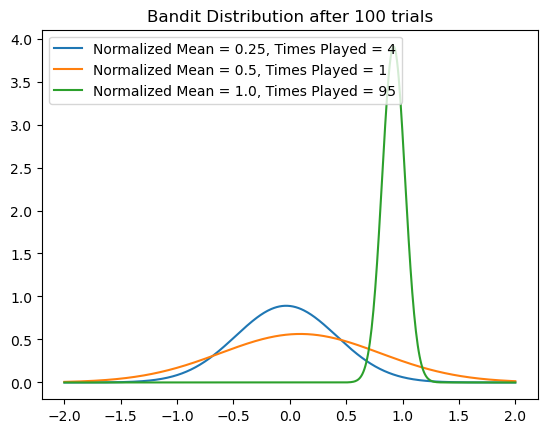

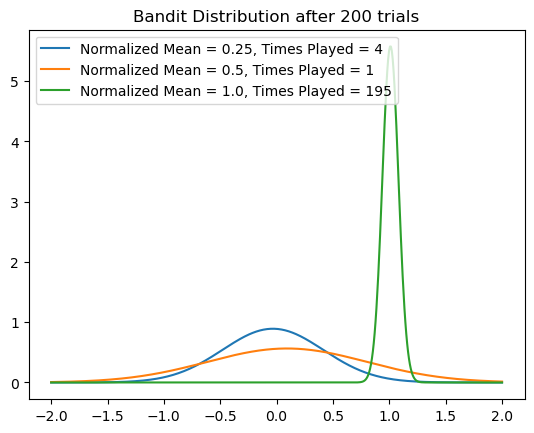

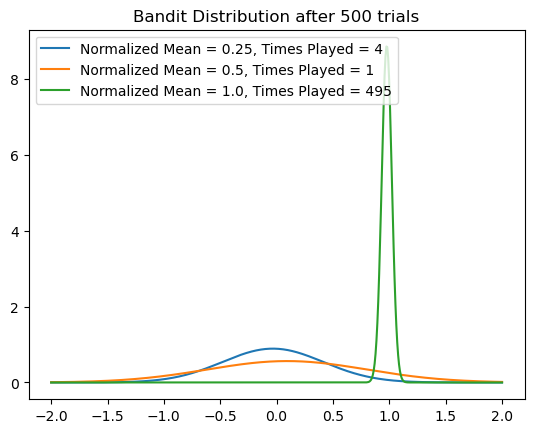

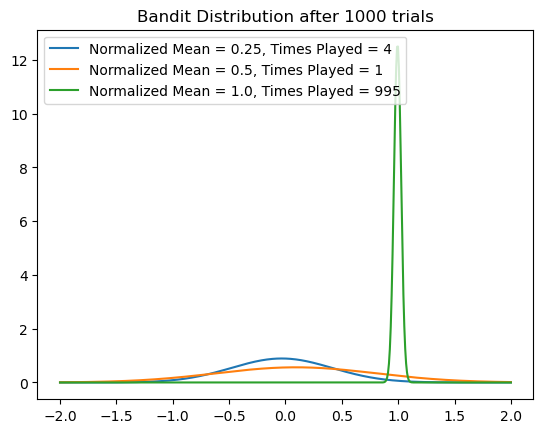

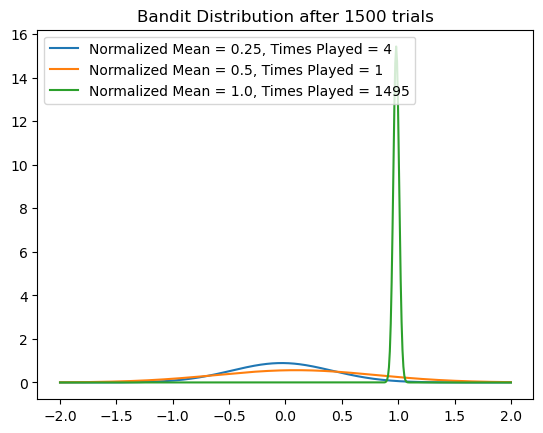

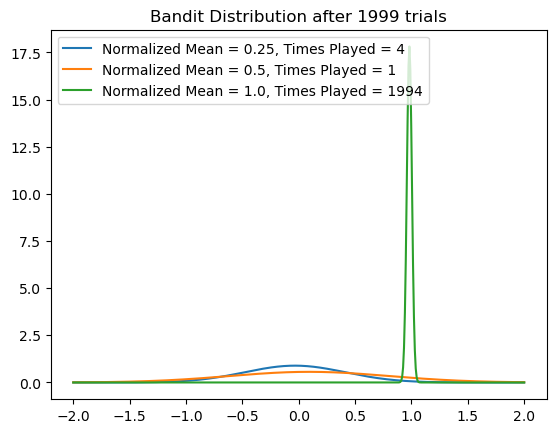

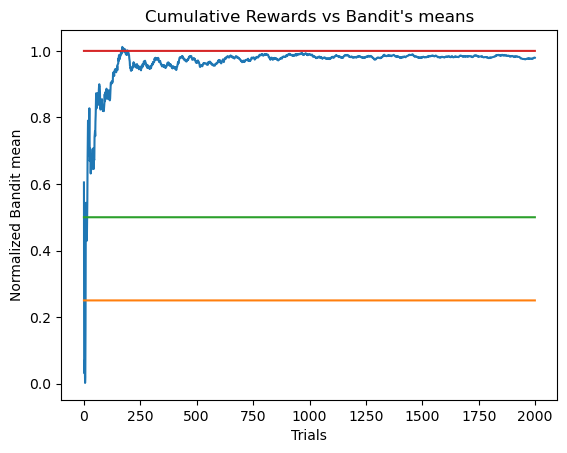

In [2]:
from __future__ import print_function, division
from builtins import range
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

NUM_TRIALS = 2000
BANDIT_MEANS = [5, 10, 20]
NORM_BANDIT_MEANS = [float(i)/max(BANDIT_MEANS) for i in BANDIT_MEANS]


class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.m = 0
        self.lambda_ = 1
        self.tau = 1
        self.N = 0

    def pull(self):
        return np.random.randn() /np.sqrt(self.tau) + self.true_mean
        
    def sample(self):
        return np.random.rand() / np.sqrt(self.lambda_) + self.m
    
    def update(self, x):
        self.m = (self.tau * x + self.lambda_ * self.m)/(self.lambda_ + self.tau)
        self.lambda_ += self.tau
        self.N += 1

def plot(bandits, trial):
    x = np.linspace(-2, 2, 500)
    for b in bandits:
        y = norm.pdf(x, b.m, np.sqrt(1/b.lambda_))
        plt.plot(x, y, label = f'Normalized Mean = {b.true_mean}, Times Played = {b.N}')
    
    plt.title(f'Bandit Distribution after {trial} trials')
    plt.legend(loc = 'upper left')
    plt.show()

def experiment():
    norm_bandits = [Bandit(m) for m in NORM_BANDIT_MEANS]
    rewards = np.empty(NUM_TRIALS)
    sample_point = [5, 10, 50, 100, 200, 500, 1000, 1500, 1999]

    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in norm_bandits])
        
        if i in sample_point:
            plot(norm_bandits,i)

        x = norm_bandits[j].pull()
        rewards[i] = x
        norm_bandits[j].update(x)

    cumulative_rewards = np.cumsum(rewards)/(np.arange(NUM_TRIALS) + 1)

    plt.plot(cumulative_rewards)
    for m in NORM_BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS) * m)
    plt.title('''Cumulative Rewards vs Bandit's means''')
    plt.xlabel('Trials')
    plt.ylabel('Normalized Bandit mean')
    plt.show()

    return cumulative_rewards

if __name__ == '__main__':
    experiment()